In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# from ROI_extraction import preprocess_image
import cv2
import os

def data_generation(dataset_path):
    ids = []
    labels = {}
    classes = {'excess':1,'normal':0,'insufficient':2}
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path) :
                if filename.endswith((".jpg", ".jpeg", ".png")):
                    img_path = os.path.join(class_path, filename) 
                    ids.append(img_path)
                    labels[img_path]=classes[class_name]

    y = np.empty((len(ids)), dtype=int)
    X = []
    for i, ID in enumerate(ids):
        img= cv2.imread(ID)
        B_val,G_val,R_val = img[:,:,0],img[:,:,1],img[:,:,2]
        # Extract the mean values of hue, saturation, and value
        R_mean = np.mean(R_val)
        G_mean = np.mean(G_val)
        B_mean = np.mean(B_val)
        # Extract the standard deviation of hue, saturation, and value
        R_std = np.std(R_val)
        G_std = np.std(G_val)
        B_std = np.std(B_val)
        X.append([R_mean,R_std,G_mean,G_std,B_mean,B_std])
        y[i] = labels[ID]
    return pd.DataFrame(X,columns=['R_mean','R_std','G_mean','G_std','B_mean','B_std']),y

In [2]:
#raw RGB
X,y = data_generation('../images/raw_pollub/')


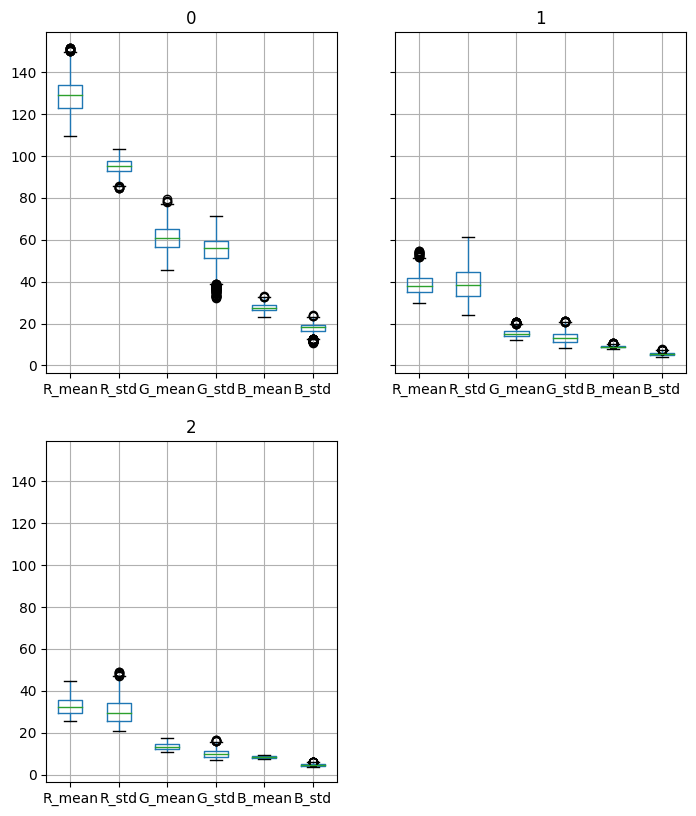

In [3]:
X.groupby(y).boxplot(figsize=(8, 10))
plt.show()

In [4]:
#ROI RGB
X,y = data_generation('../images/ROI_pollub')

<Figure size 640x480 with 0 Axes>

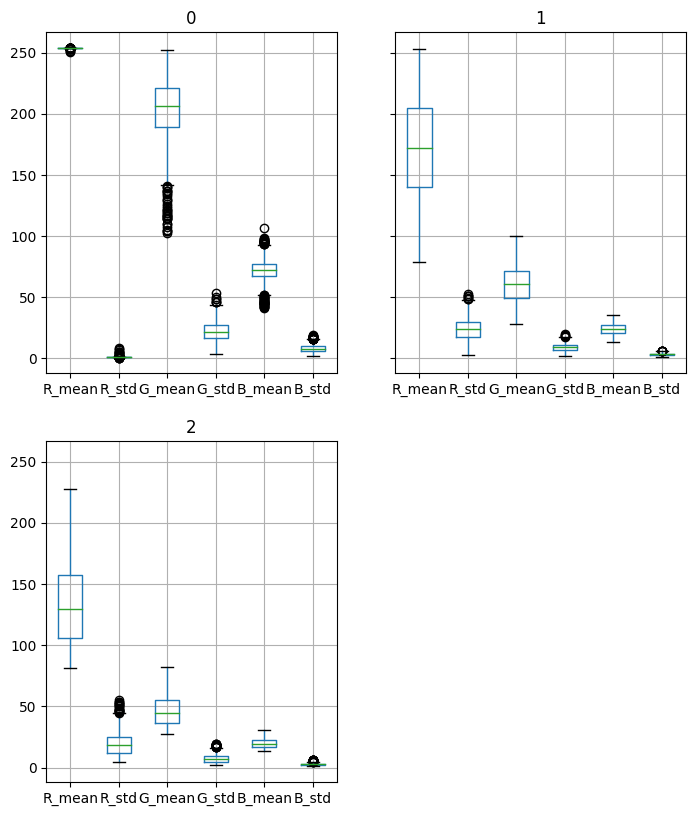

In [5]:
plt.clf()
X.groupby(y).boxplot(figsize=(8, 10))
plt.show()